# Caminos Más Cortos

En este caso, queremos representar las intersecciones de los caminos de una ciudad mediante vértices de un multi-grafo dirigido ponderado. La ponderación o peso de la arista corresponde al largo del segmento, por lo tanto podemos utilizar el algoritmo Dijsktra para calcular el costo de un camino entre dos puntos. 

In [1]:
!pip install haversine
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 56.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.27.1, but you have reques

/usr/local/lib/python3.10/dist-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(
INFO:OSMnx:Pausing 1 seconds before making HTTP GET request
INFO:OSMnx:Get https://nominatim.openstreetmap.org/search?format=json&polygon_geojson=1&dedupe=0&limit=50&q=Talca%2CChile with timeout=180
INFO:OSMnx:Resolved 'nominatim.openstreetmap.org' to '140.211.167.100'
INFO:OSMnx:Downloaded 45.6kB from nominatim.openstreetmap.org
INFO:OSMnx:Saved response to cache file PosixPath('cache/aa8f8e87c55f89e2fbea9e1891830562d8a0c50e.json')
INFO:OSMnx:Created GeoDataFrame with 1 rows from 1 queries
INFO:OSMnx:Constructed place geometry polygon(s) to query API
INFO:OSMnx:Projected GeoDataFrame to +proj=utm +zone=19 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
INFO:OSMnx:Projected GeoDataFra

<Figure size 1500x400 with 0 Axes>

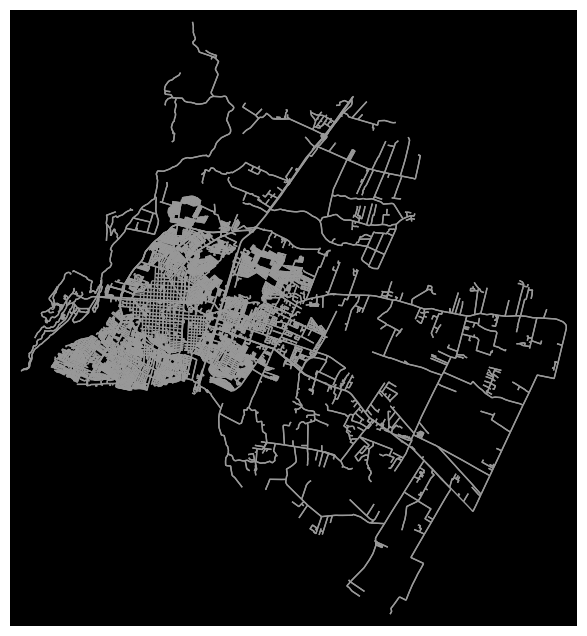

In [2]:
import osmnx as ox
import networkx as nx
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

ox.config(log_file=True, log_console=True, use_cache=True)
G=ox.graph_from_place('Talca,Chile',network_type='all', simplify=True)
#ox.save_graphml(G, filename='talca_ciclovias.graphml')
plt.figure(figsize=(15,4))
ox.plot_graph(ox.project_graph(G),node_size=0, bgcolor='k')
plt.show()




In [12]:
for e in G.edges(data=True):
  print(e)
  break

(268893035, 1172702645, {'osmid': 83188768, 'oneway': True, 'lanes': '1', 'highway': 'motorway_link', 'maxspeed': '40', 'reversed': False, 'length': 19.977, 'speed_kph': 40.0, 'travel_time': 1.8})


In [6]:
nx.is_connected(G)

In [7]:
nx.is_weakly_connected(G)

True

In [8]:
stats=ox.basic_stats(G)
df=pd.DataFrame(pd.Series(stats)).T
display(df.T) 

INFO:OSMnx:Created edges GeoDataFrame from graph
INFO:OSMnx:Converted MultiDiGraph to undirected MultiGraph


,0
n,12004
m,31801
k_avg,5.298401
edge_length_total,2510900.14
edge_length_avg,78.956641
streets_per_node_avg,2.916445
streets_per_node_counts,"{0: 0, 1: 1781, 2: 34, 3: 7657, 4: 2476, 5: 51..."
streets_per_node_proportions,"{0: 0.0, 1: 0.1483672109296901, 2: 0.002832389..."
intersection_count,10223
street_length_total,1371827.129


In [9]:
G=G.to_undirected()

In [10]:
origin_point = (-35.434415,-71.620053)
destination_point = (-35.425901, -71.666645)
orig=ox.distance.nearest_nodes(G, origin_point[1],origin_point[0])
dest=ox.distance.nearest_nodes(G,destination_point[1],destination_point[0])

print('Inicio : ',G.nodes[orig])
print('Destino : ',G.nodes[dest])

INFO:OSMnx:Created nodes GeoDataFrame from graph
INFO:OSMnx:Created nodes GeoDataFrame from graph


Inicio :  {'y': -35.4331723, 'x': -71.6199605, 'street_count': 3}
Destino :  {'y': -35.425907, 'x': -71.666663, 'street_count': 3}


In [11]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

INFO:OSMnx:Created edges GeoDataFrame from graph
INFO:OSMnx:Created edges GeoDataFrame from graph


INFO:OSMnx:Begin plotting the graph...
INFO:OSMnx:Created edges GeoDataFrame from graph
INFO:OSMnx:Created nodes GeoDataFrame from graph
INFO:OSMnx:Finished plotting the graph


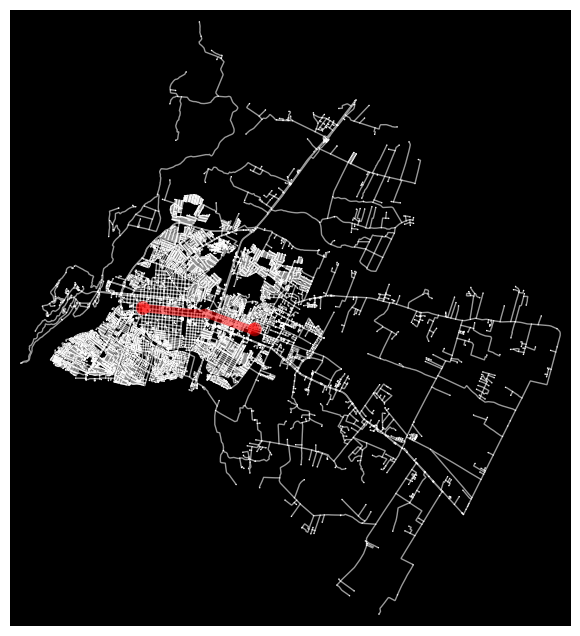

In [57]:
route = nx.shortest_path(G, orig, dest, weight='length')
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=1, bgcolor='k')

In [58]:
path_weight_km=nx.shortest_path_length(G,source=orig,target=dest,weight='length')/1000.
print('Largo del camino : {0:2.2f} [km] '.format(path_weight_km))

Largo del camino : 4.45 [km] 


In [39]:
import numpy as np
from heapq import heappush,heappop

class abstract_graph:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
        
    def adjacency_matrix(self):
        pass
    
    def adjacency_list(self):
        pass

    
class weighted_graph(abstract_graph):
    
    def __init__(self,_edges):
        tmp=dict()
        for (u,v),w in _edges.items():
            tmp.update({(u,v):w})
            if (v,u) not in tmp.keys() and v!=u:
                tmp.update({(v,u):w})
        self.edges=tmp
        self.nodes={u for u,v in _edges} | {v for u,v in _edges}
        
    def adjacency_matrix(self):
        n=len(self.nodes)
        mat=np.zeros((n,n))
        adjacent=lambda x : [1 if x==v else 0 for (u,v) in enumerate(sorted(list(G.nodes))) ]
        L=self.adjacency_list()
        i=0
        for v in sorted(list(G.nodes)):
            for l in L[v]:
                mat[i,]+=adjacent(l)
            i=i+1
        return mat
    
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges.keys() if u==n } 
        return {v:adjacent(v) for v in self.nodes}

def dijkstra(G,start):
    if start not in G.nodes:
        return None
    neighbors=G.adjacency_list()
    path={}    
    path.update({start:None})
    distance={}
    distance.update({start:0})
    frontier=[]
    heappush(frontier,(0,start))
    while frontier:
      dist_u,u=heappop(frontier)
      for v in neighbors[u]:
        dist_v=dist_u+G.edges[(u,v)]
        if v not in distance.keys() or dist_v<distance[v]:
          path.update({v:u})
          distance.update({v:dist_v})
          heappush(frontier,(dist_v,v))
    return path,distance

In [40]:
import haversine as hs
from haversine import Unit

data=G.nodes.data()
length = lambda u,v : hs.haversine((data[u]['y'],data[u]['x']),(data[v]['y'],data[v]['x']),
                                   unit=Unit.METERS)
E={(u,v):length(u,v) for u,v,w in G.edges}

In [41]:
G_2=weighted_graph(E)
parent,distance=dijkstra(G_2,orig)

In [45]:
path_weight_km=distance[dest]/1000.
print('Largo del camino : {0:2.2f} [km] '.format(path_weight_km))


Largo del camino : 4.43 [km] 


In [46]:
def tree_path(parent,end):
    path=[end]
    k=end
    while k is not None:
        path.append(parent[k])
        k=parent[k]
    return path[:-1][::-1]

In [47]:
route_2=tree_path(parent,dest)

In [49]:
for node in route_2:
  print(data[node])

{'y': -35.4331723, 'x': -71.6199605, 'street_count': 3}
{'y': -35.4326658, 'x': -71.6207051, 'street_count': 4}
{'y': -35.4328611, 'x': -71.621129, 'street_count': 3}
{'y': -35.4333485, 'x': -71.6214745, 'street_count': 4}
{'y': -35.4331818, 'x': -71.622043, 'street_count': 3}
{'y': -35.4328648, 'x': -71.6231239, 'street_count': 3}
{'y': -35.4325049, 'x': -71.624351, 'street_count': 4}
{'y': -35.4324217, 'x': -71.6246335, 'street_count': 3}
{'y': -35.4321683, 'x': -71.625479, 'street_count': 3}
{'y': -35.4321409, 'x': -71.6255705, 'street_count': 3}
{'y': -35.4320566, 'x': -71.625852, 'street_count': 3}
{'y': -35.4318504, 'x': -71.626541, 'street_count': 3}
{'y': -35.4318303, 'x': -71.6266083, 'street_count': 3}
{'y': -35.431765, 'x': -71.6268265, 'street_count': 3}
{'y': -35.4315684, 'x': -71.6274858, 'street_count': 3}
{'y': -35.4314526, 'x': -71.6278582, 'street_count': 5}
{'y': -35.4313638, 'x': -71.6282029, 'street_count': 4}
{'y': -35.4313409, 'x': -71.6282784, 'highway': 'crossi